In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.cm as cm

random_state = 0 # Magic

# First look
- Load data
- Are there any inf/nans? Why?

In [2]:
complete_df = pd.read_csv("../../data/raw/zebrafish26.01.2017_fish0.csv")

In [3]:
complete_df.describe()

,frame,ACCELERATION#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),NEIGHBOR_DISTANCE (cm),SPEED#pcentroid (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),time#centroid
count,958978.000000,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05
mean,479488.500000,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,276833.247562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,7.644270e+00,-3.141580e+00,1.182210e+00,1.261620e+00,7.641350e+00,1.749750e-01,0.000000e+00,-8.816930e+01,-7.741760e+01,1.177870e+00,1.260830e+00,0.000000e+00
25%,239744.250000,1.446310e+01,-1.698317e+00,7.258655e+00,7.817897e+00,1.446340e+01,2.908033e+00,6.035120e-01,-7.752690e-01,-7.339840e-01,7.258625e+00,7.818043e+00,1.817332e+03
50%,479488.500000,1.827870e+01,2.497290e-02,1.233315e+01,1.219000e+01,1.827850e+01,6.753790e+00,1.328415e+00,-6.393230e-02,9.765620e-03,1.233310e+01,1.219030e+01,3.634650e+03
75%,719232.750000,2.445200e+01,1.751330e+00,1.835180e+01,1.771350e+01,2.445218e+01,1.428877e+01,2.678730e+00,6.730960e-01,7.515120e-01,1.835200e+01,1.771350e+01,5.451977e+03
max,958977.000000,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [4]:
complete_df[: 10]

,frame,ACCELERATION#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),NEIGHBOR_DISTANCE (cm),SPEED#pcentroid (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),time#centroid
0,0,16.2389,-2.64618,11.3537,11.2528,16.2481,11.4224,0.00000,0.00000,0.000000,11.3642,11.2586,0.000000
1,1,16.2249,-2.63043,11.3410,11.2462,16.2296,11.4362,2.42549,-2.71187,-1.520640,11.3432,11.2469,0.007724
2,2,16.2004,-2.61268,11.3183,11.2343,16.1970,11.4617,4.49863,-3.70561,-1.835570,11.3157,11.2332,0.015164
3,3,16.1728,-2.62750,11.2953,11.2206,16.1747,11.4850,3.06645,-2.60472,-1.387290,11.2960,11.2227,0.022721
4,4,16.1490,-2.60514,11.2759,11.2084,16.1466,11.5155,3.69247,-2.76665,-2.146190,11.2743,11.2059,0.030563
5,5,16.1283,-2.58394,11.2561,11.1961,16.1258,11.5173,2.31873,-1.82798,-0.999896,11.2573,11.1966,0.039827
6,6,16.1080,-2.63296,11.2375,11.1865,16.1125,11.5164,2.38489,-3.56786,-1.859390,11.2366,11.1859,0.045634
7,7,16.0895,-2.61817,11.2182,11.1766,16.0857,11.5143,3.65688,-2.39991,-1.156810,11.2184,11.1771,0.053216
8,8,16.0688,-2.60299,11.1996,11.1662,16.0704,11.5269,2.13446,-2.49428,-1.379210,11.1997,11.1667,0.060726
9,9,16.0526,-2.62424,11.1827,11.1554,16.0504,11.5320,2.77819,-2.50912,-1.582250,11.1808,11.1548,0.068268


In [5]:
complete_df[np.isnan(complete_df)].count()

frame                             0
ACCELERATION#pcentroid (cm/s2)    0
ANGLE                             0
AX                                0
AY                                0
BORDER_DISTANCE#pcentroid (cm)    0
NEIGHBOR_DISTANCE (cm)            0
SPEED#pcentroid (cm/s)            0
VX (cm/s)                         0
VY (cm/s)                         0
X (cm)                            0
Y (cm)                            0
time#centroid                     0
dtype: int64

In [6]:
complete_df[np.isinf(complete_df)].count()

frame                              0
ACCELERATION#pcentroid (cm/s2)    12
ANGLE                             12
AX                                12
AY                                12
BORDER_DISTANCE#pcentroid (cm)    12
NEIGHBOR_DISTANCE (cm)            12
SPEED#pcentroid (cm/s)            12
VX (cm/s)                         12
VY (cm/s)                         12
X (cm)                            12
Y (cm)                            12
time#centroid                     12
dtype: int64

## Subsample
Let's look at some of the data, consider a random subsample for quicker results.

Deal with Infs later!

In [7]:
# Remove inf/-inf/nan first
df = complete_df.replace([np.inf, -np.inf], np.nan).dropna()
df = df.sample(frac=0.1, random_state=np.random.RandomState(random_state))
df.describe()

,frame,ACCELERATION#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),NEIGHBOR_DISTANCE (cm),SPEED#pcentroid (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),time#centroid
count,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000,95897.000000
mean,479501.081129,19.713946,0.024396,13.152088,12.980517,19.713954,8.951826,1.945863,-0.006144,-0.006173,13.152115,12.980500,3634.745602
std,276515.993849,6.526729,1.904832,6.800032,6.572177,6.526739,6.823759,1.856763,2.271557,2.271600,6.800034,6.572208,2096.063486
min,7.000000,7.646590,-3.141580,1.255910,1.318130,7.643000,0.197205,0.002276,-66.970400,-77.417600,1.254440,1.319300,0.053216
25%,241229.000000,14.471700,-1.705470,7.258450,7.820270,14.471400,2.907880,0.610175,-0.784025,-0.737793,7.258430,7.820200,1828.580000
50%,479245.000000,18.312900,0.029227,12.367100,12.172700,18.313800,6.782860,1.332270,-0.063531,0.010742,12.366900,12.173700,3632.800000
75%,718198.000000,24.458600,1.750340,18.401000,17.705100,24.458900,14.267900,2.678140,0.671387,0.754395,18.400300,17.705700,5444.130000
max,958976.000000,34.996400,3.141530,28.808800,28.887300,34.993700,27.308200,27.181900,76.286400,72.035100,28.810500,28.886700,7269.290000


# Some summary stats
- Where are the fish located mostly?
- How fast are they?
- How close are they to the border?
- How close are they to each other?

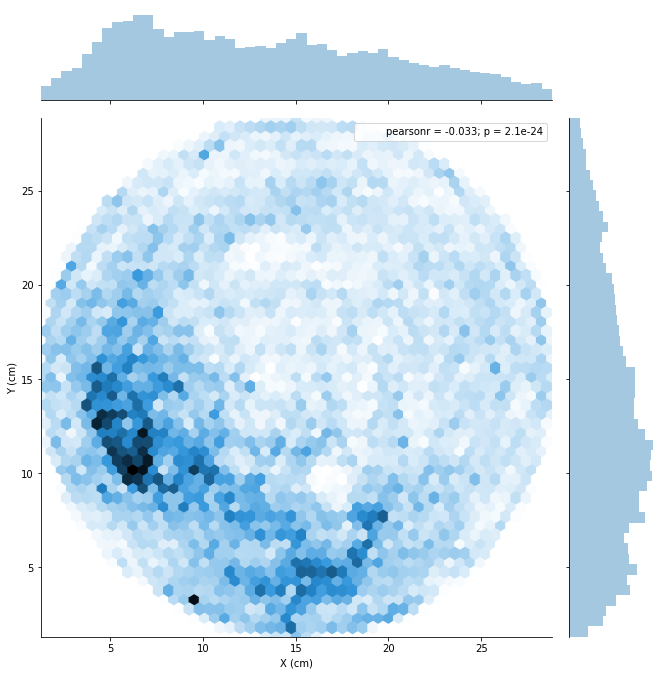

In [8]:
# Look at the density of the position.
x = df['X (cm)']
y = df['Y (cm)']
fig = sns.jointplot(x,y, kind='hex')
fig.fig.set_figwidth(10)
fig.fig.set_figheight(10)

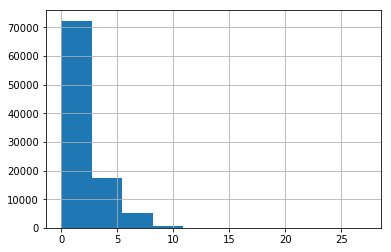

In [10]:
df['SPEED#pcentroid (cm/s)'].hist()

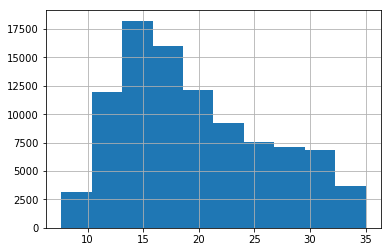

In [11]:
df['BORDER_DISTANCE#pcentroid (cm)'].hist()

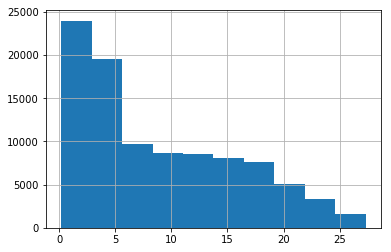

In [12]:
df['NEIGHBOR_DISTANCE (cm)'].hist()